In [37]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [38]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [39]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [40]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [41]:
# reflect an existing database into a new model
base = automap_base()
base.prepare(autoload_with=engine)
# reflect the tables


In [42]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [43]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [44]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [45]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
recent_date

('2017-08-23',)

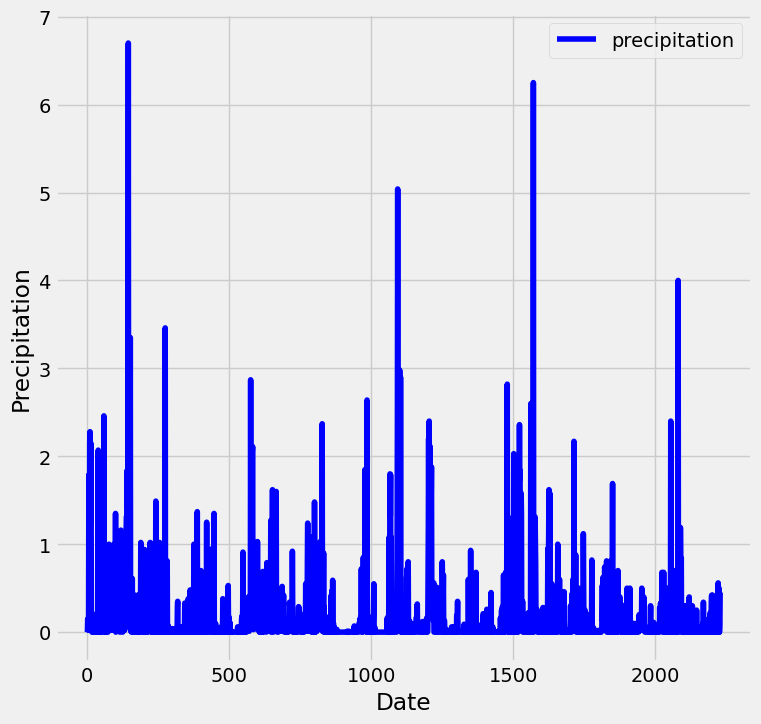

In [60]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_ago_date = dt.date(2017, 8, 23) - dt.timedelta(days= 365)
#Checking to see the date from a year ago
#print(year_ago_date)
# Perform a query to retrieve the data and precipitation scores
prec_data = session.query(measurement.date, measurement.prcp).order_by(measurement.date.asc()).\
    filter(measurement.date >= year_ago_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prec_df = pd.DataFrame(prec_data)
prec_df = prec_df.rename(columns= {"prcp" : "precipitation", "date" : "date"})

# Sort the dataframe by date
prec_df.sort_values(by = ["date"], ascending=True)
prec_df = prec_df.dropna()

# Use Pandas Plotting with Matplotlib to plot the data
plt_bar = prec_df.plot(color = 'b', figsize=(8,8))

plt_bar.set_xlabel("Date")
plt_bar.set_ylabel('Precipitation')
plt.show()

In [47]:
# Use Pandas to calculate the summary statistics for the precipitation data
prec_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [57]:
# Design a query to calculate the total number of stations in the dataset
station_total = session.query(station).group_by(station).count()
station_total

9

In [58]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_activity = session.query(measurement.station,func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [69]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_avg = session.query(
                            func.min(measurement.tobs),
                            func.max(measurement.tobs),
                            func.avg(measurement.tobs)).\
                            filter(measurement.station == 'USC00519281').all()
print(station_avg)

[(54.0, 85.0, 71.66378066378067)]


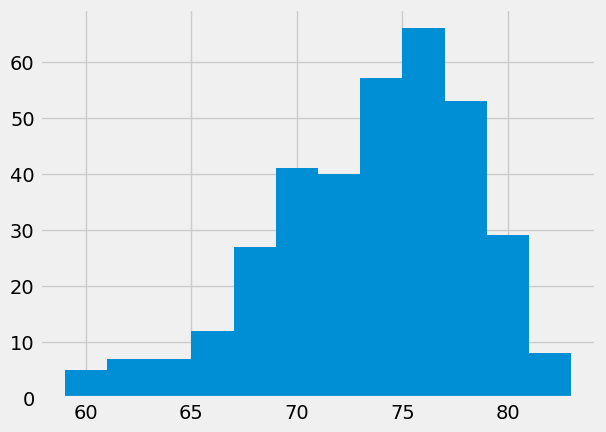

In [94]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

top_station = session.query(measurement.date, measurement.tobs).order_by(measurement.date.desc()).\
    filter(measurement.date >= year_ago_date).\
    filter(measurement.station == 'USC00519281').all()
top_station_df = pd.DataFrame(top_station)
histogram = plt.hist(top_station_df['tobs'], bins= 12)
plt.show()

# Close Session

In [16]:
# Close Session
session.close()